In [28]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [13]:
root = 'data'
paths = os.listdir(root)

paths_ecg = []
paths_ppg = []
paths_ecg_ppg = []
paths_fusion = []
paths_fusion_completed = []

for path_data in paths:
    path = os.path.join(root, path_data)
    if 'ECG_PPG' in path:
        paths_ecg_ppg.append(path)
    elif 'FedAvgBio' in path:
        paths_fusion_completed.append(path)
    elif 'Fusion' in path:
        paths_fusion.append(path)
    elif 'ECG' in path:
        paths_ecg.append(path)
    elif 'PPG' in path:
        paths_ppg.append(path)

In [31]:
# Função para calcular a média de 'rs_test_acc' para uma lista de caminhos
def calculate_mean_accuracy(paths):
    acc = []
    for path in paths:
        with h5py.File(path, 'r') as file:
            acc.append(file['rs_test_acc'][:])
    return np.mean(np.array(acc), axis=0)

# Calculando as médias para cada conjunto de dados
acc_ecg = calculate_mean_accuracy(paths_ecg)
acc_ppg = calculate_mean_accuracy(paths_ppg)
acc_ecg_ppg = calculate_mean_accuracy(paths_ecg_ppg)
acc_fusion = calculate_mean_accuracy(paths_fusion)
acc_fusion_completed = calculate_mean_accuracy(paths_fusion_completed)

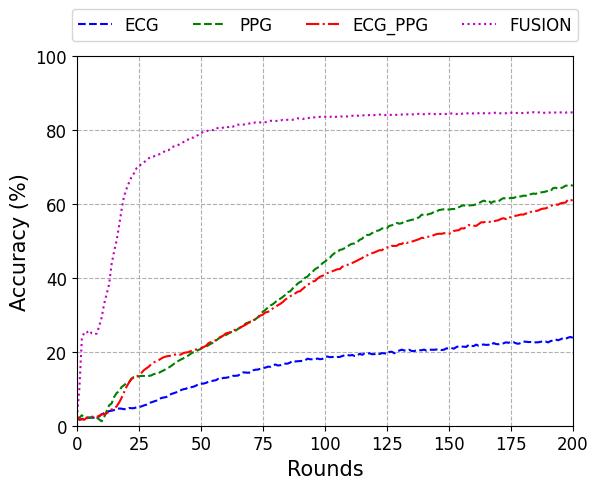

In [ ]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, acc_ecg*100, label="ECG", linestyle='--', color='b')  
plt.plot(indexes, acc_ppg*100, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, acc_ecg_ppg*100, label="ECG_PPG", linestyle='-.', color='r')  
#plt.plot(indexes, acc_fusion*100, label="FUSION", linestyle=':', color='c')  
plt.plot(indexes, acc_fusion_completed*100, label="FUSION", linestyle=':', color='m')

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)
plt.ylim(0, 100)

# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.show()
